# 1. Testowanie działania YOLOv8

YOLOv8n summary: 225 layers, 3,157,200 parameters, 0 gradients

image 1/1 d:\__STUDIA__\__INFA__\7_sem\MRO\lab04\kod\kotzpsem.jpg: 640x576 2 cats, 1 dog, 383.9ms
Speed: 19.3ms preprocess, 383.9ms inference, 15.7ms postprocess per image at shape (1, 3, 640, 576)


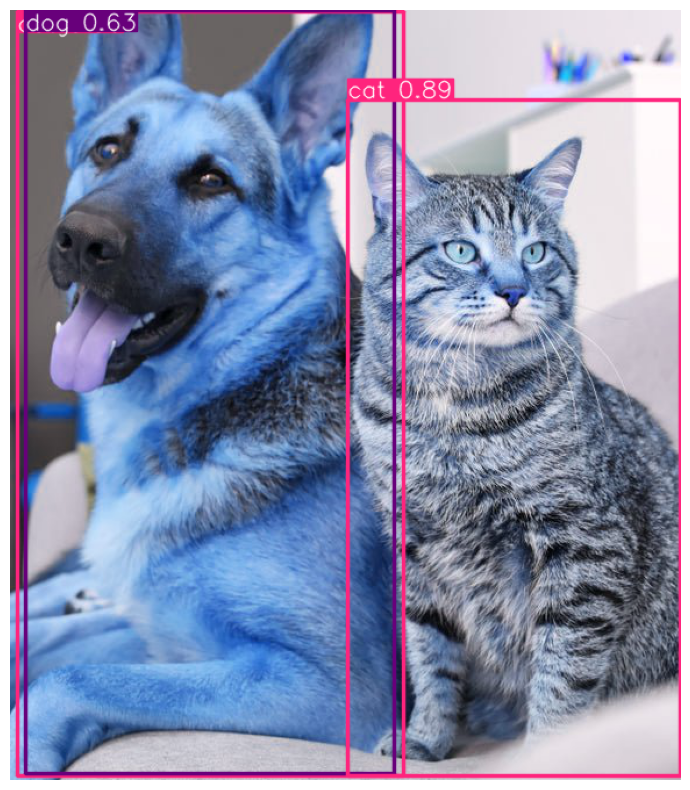

Predicted Objects and Probabilities:
Object: cat, Confidence: 0.89, Coords: tensor([[290,  77, 576, 659]], dtype=torch.int32)
Object: dog, Confidence: 0.63, Coords: tensor([[ 13,   0, 330, 657]], dtype=torch.int32)
Object: cat, Confidence: 0.56, Coords: tensor([[  6,   1, 338, 659]], dtype=torch.int32)


In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import torch

model = YOLO("yolov8n.pt")

model.info()

result = model(source="./kotzpsem.jpg")
result_image = result[0].plot()

plt.figure(figsize=(10, 10))
plt.imshow(result_image)
plt.axis("off")
plt.show()

boxes = result[0].boxes  # Get bounding boxes and related information

print("Predicted Objects and Probabilities:")
for box in boxes:
    class_id = int(box.cls) 
    confidence = float(box.conf) 
    class_name = model.names[class_id]
    coords = box.xyxy
    coords = coords.type(torch.IntTensor)
    print(f"Object: {class_name}, Confidence: {confidence:.2f}, Coords: {coords}")

# Trening

In [ ]:
model = YOLO('yolov8n.pt') 

# Trening modelu
results = model.train(
    data='dataset/data.yaml',  
    epochs=10,
    imgsz=640,
    batch=16,
)

Ultralytics 8.3.31  Python-3.11.10 torch-2.3.0 CPU (13th Gen Intel Core(TM) i7-1360P)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 1.01MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 22        [15, 18, 21]  1    751507  ultralytics.nn.modules.head.Detect           [1, [64, 128, 256]]           
Model summary: 225 layers, 3,011,043 parameters, 3,011,027 gradients

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'


train: Scanning D:\__STUDIA__\__INFA__\7_sem\MRO\lab04\kod\dataset\train\labels... 3335 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3335/3335 [00:02<00:00, 1204.18it/s]


train: New cache created: D:\__STUDIA__\__INFA__\7_sem\MRO\lab04\kod\dataset\train\labels.cache


val: Scanning D:\__STUDIA__\__INFA__\7_sem\MRO\lab04\kod\dataset\val\labels... 406 images, 0 backgrounds, 0 corrupt: 100%|██████████| 406/406 [00:00<00:00, 1681.64it/s]

val: New cache created: D:\__STUDIA__\__INFA__\7_sem\MRO\lab04\kod\dataset\val\labels.cache


Plotting labels to d:\__STUDIA__\__INFA__\7_sem\MRO\runs\detect\train5\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to d:\__STUDIA__\__INFA__\7_sem\MRO\runs\detect\train5
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.255      4.475      1.505         16        640:   0%|          | 1/209 [00:05<18:00,  5.20s/it]

In [ ]:
history = results.results
plt.plot(history['epoch'], history['loss'], label='Loss')
plt.xlabel('Epoka')
plt.ylabel('Funkcja kosztu (Loss)')
plt.title('Wykres funkcji kosztu')
plt.legend()
plt.grid(True)
plt.show()